In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objects as go
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_excel("D:\Dump\DATAQuest_Statistics_Prelims\CaseStudyStatP23.xlsx")

In [3]:
## Defining objectives of the study
## ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

# 1. Check if there is any difference between the Demographical variables and the result variables
# 2. correlation between the continuous data

## What to do
## ^^^^^^^^^

# 1. Create a new data set with new columns with values recorded at each visit - Done
# 2. Check the categorical values, if they are same in all the visits or not (Treatment, Gender, Age, Race, Country) - Done
# 3. Apply test for checking which treatment is better accross Demographical Variables
# 4. Create two datasets with treatment A and treatment B - Done

In [4]:
data

ID Treatment  Gender  Visit  Age        BMI      weight       Race  \
0      1         A    Male      0   14  28.296901  121.403843  Caucasian   
1      1         A    Male      1   14  25.887250  100.480775  Caucasian   
2      1         A    Male      2   14  24.213816   86.746921  Caucasian   
3      1         A    Male      3   14  25.247586   85.777106  Caucasian   
4      2         A    Male      0   17  27.437996  123.189625      Asian   
..   ...       ...     ...    ...  ...        ...         ...        ...   
995  249         B  Female      3   18  22.715878   69.985451      Asian   
996  250         B  Female      0   16  25.463095  111.051186      Asian   
997  250         B  Female      1   16  25.167124   82.482691      Asian   
998  250         B  Female      2   16  23.204562   78.196079      Asian   
999  250         B  Female      3   16  22.590080   69.515238      Asian   

    Country        UCS        ECS        RCS  MedIncome  
0       USA  17.189710  14.541244  19.702053   33843.52  
1       USA  13.256006  14.857301  19.139352   33843.52  
2       USA  10.928215  13.269463  17.696518   33843.52  
3       USA   8.457420  10.078863  14.638157   33843.52  
4     China  15.371139  16.334041  19.740263   38348.72  
..      ...        ...        ...        ...        ...  
995   China   7.153691   5.774631  18.004758   38418.29  
996   China  13.713957  12.269785  19.652139   38573.42  
997   China  12.267434  10.635047  19.785668   38573.42  
998   China   9.537552   8.519068  18.759650   38573.42  
999   China   7.366620   5.221496  17.821047   38573.42  

[1000 rows x 13 columns]

In [5]:
#visit wise dataframe for 250 patients
visit0 = data[data["Visit"] == 0]
visit1 = data[data["Visit"] == 1]
visit2 = data[data["Visit"] == 2]
visit3 = data[data["Visit"] == 3]

In [6]:
#detecting anomalies in Gender
print(sum(np.array(visit0.Gender) != np.array(visit1.Gender)))
print(sum(np.array(visit0.Gender) != np.array(visit2.Gender)))
print(sum(np.array(visit0.Gender) != np.array(visit3.Gender)))
print(sum(np.array(visit1.Gender) != np.array(visit2.Gender)))
print(sum(np.array(visit1.Gender) != np.array(visit3.Gender)))
print(sum(np.array(visit2.Gender) != np.array(visit3.Gender)))

0
2
2
2
2
0


In [7]:
#detecting anomalies in Treatment
print(sum(np.array(visit0['Treatment']) != np.array(visit1['Treatment'])))
print(sum(np.array(visit0['Treatment']) != np.array(visit2['Treatment'])))
print(sum(np.array(visit0['Treatment']) != np.array(visit3['Treatment'])))
print(sum(np.array(visit1['Treatment']) != np.array(visit2['Treatment'])))
print(sum(np.array(visit1['Treatment']) != np.array(visit3['Treatment'])))
print(sum(np.array(visit2['Treatment']) != np.array(visit3['Treatment'])))

0
0
0
0
0
0


In [8]:
print(sum(np.array(visit0['Age']) != np.array(visit1['Age'])))
print(sum(np.array(visit0['Age']) != np.array(visit2['Age'])))
print(sum(np.array(visit0['Age']) != np.array(visit3['Age'])))
print(sum(np.array(visit1['Age']) != np.array(visit2['Age'])))
print(sum(np.array(visit1['Age']) != np.array(visit3['Age'])))
print(sum(np.array(visit2['Age']) != np.array(visit3['Age'])))

0
0
0
0
0
0


In [9]:
print(sum(np.array(visit0['Race']) != np.array(visit1['Race'])))
print(sum(np.array(visit0['Race']) != np.array(visit2['Race'])))
print(sum(np.array(visit0['Race']) != np.array(visit3['Race'])))
print(sum(np.array(visit1['Race']) != np.array(visit2['Race'])))
print(sum(np.array(visit1['Race']) != np.array(visit3['Race'])))
print(sum(np.array(visit2['Race']) != np.array(visit3['Race'])))

0
0
0
0
0
0


In [10]:
print(sum(np.array(visit0['Country']) != np.array(visit1['Country'])))
print(sum(np.array(visit0['Country']) != np.array(visit2['Country'])))
print(sum(np.array(visit0['Country']) != np.array(visit3['Country'])))
print(sum(np.array(visit1['Country']) != np.array(visit2['Country'])))
print(sum(np.array(visit1['Country']) != np.array(visit3['Country'])))
print(sum(np.array(visit2['Country']) != np.array(visit3['Country'])))

0
0
0
0
0
0


In [11]:
print(sum(np.array(visit0['MedIncome']) != np.array(visit1['MedIncome'])))
print(sum(np.array(visit0['MedIncome']) != np.array(visit2['MedIncome'])))
print(sum(np.array(visit0['MedIncome']) != np.array(visit3['MedIncome'])))
print(sum(np.array(visit1['MedIncome']) != np.array(visit2['MedIncome'])))
print(sum(np.array(visit1['MedIncome']) != np.array(visit3['MedIncome'])))
print(sum(np.array(visit2['MedIncome']) != np.array(visit3['MedIncome'])))

0
0
0
0
0
0


In [12]:
raw_data = pd.DataFrame({
    "ID" : np.array(visit0.ID),
    "Treatment" : np.array(visit0.Treatment),
    "Gender0" : np.array(visit0.Gender),
    "Gender1" : np.array(visit1.Gender),
    "Gender2" : np.array(visit2.Gender),
    "Gender3" : np.array(visit3.Gender),
    "Age" : np.array(visit0.Age),
    "Race" : np.array(visit0.Race),
    "Country" : np.array(visit0.Country),
    "MedIncome" : np.array(visit0.MedIncome),
    "BMI_0" : np.array(visit0.BMI),
    "BMI_1" : np.array(visit1.BMI),
    "BMI_2" : np.array(visit2.BMI),
    "BMI_3" : np.array(visit3.BMI),
    "weight_0" : np.array(visit0.weight),
    "weight_1" : np.array(visit1.weight),
    "weight_2" : np.array(visit2.weight),
    "weight_3" : np.array(visit3.weight),
    "UCS_0" : np.array(visit0.UCS),
    "UCS_1" : np.array(visit1.UCS),
    "UCS_2" : np.array(visit2.UCS),
    "UCS_3" : np.array(visit3.UCS),
    "ECS_0" : np.array(visit0.ECS),
    "ECS_1" : np.array(visit1.ECS),
    "ECS_2" : np.array(visit2.ECS),
    "ECS_3" : np.array(visit3.ECS),
    "RCS_0" : np.array(visit0.RCS),
    "RCS_1" : np.array(visit1.RCS),
    "RCS_2" : np.array(visit2.RCS),
    "RCS_3" : np.array(visit3.RCS),
})

In [13]:
visit0.Gender.value_counts() 
# Need to categorise one observation for male and another observation to female to balance data

Male      126
Female    124
Name: Gender, dtype: int64

In [14]:
raw_data[np.array(visit0.Gender) != np.array(visit2.Gender)]

ID Treatment Gender0 Gender1 Gender2 Gender3  Age      Race  \
62    63         A    Male    Male  Female  Female   14  Hispanic   
187  188         B    Male    Male  Female  Female   15   African   

          Country  MedIncome      BMI_0      BMI_1      BMI_2      BMI_3  \
62         Mexico   31944.55  27.199748  25.723547  23.777716  23.712715   
187  Cook Islands    6901.74  26.206374  25.206454  23.833513  23.844915   

       weight_0    weight_1   weight_2   weight_3      UCS_0      UCS_1  \
62   118.723615  100.619269  83.822210  83.154347  16.336387  12.626170   
187  105.405304   87.010986  77.470534  71.880309  12.044900  10.345541   

        UCS_2     UCS_3      ECS_0      ECS_1      ECS_2     ECS_3      RCS_0  \
62   9.240811  9.489394  17.447200  14.974734  12.970802  8.254983  19.705934   
187  8.924202  7.118145  12.164698  11.020282   8.140386  5.696601  19.621742   

         RCS_1      RCS_2      RCS_3  
62   19.373235  16.886389  15.434549  
187  19.662847  19.115238  17.391797

In [15]:
raw_data[(raw_data.Age==14) & (raw_data.Race == 'Hispanic')]

ID Treatment Gender0 Gender1 Gender2 Gender3  Age      Race Country  \
62    63         A    Male    Male  Female  Female   14  Hispanic  Mexico   
82    83         A  Female  Female  Female  Female   14  Hispanic  Mexico   
101  102         A  Female  Female  Female  Female   14  Hispanic  Mexico   
152  153         B    Male    Male    Male    Male   14  Hispanic  Mexico   
163  164         B    Male    Male    Male    Male   14  Hispanic  Mexico   
183  184         B    Male    Male    Male    Male   14  Hispanic  Mexico   
191  192         B  Female  Female  Female  Female   14  Hispanic  Mexico   
206  207         B  Female  Female  Female  Female   14  Hispanic  Mexico   
207  208         B  Female  Female  Female  Female   14  Hispanic  Mexico   
216  217         B  Female  Female  Female  Female   14  Hispanic  Mexico   

     MedIncome      BMI_0      BMI_1      BMI_2      BMI_3    weight_0  \
62    31944.55  27.199748  25.723547  23.777716  23.712715  118.723615   
82    32301.93  26.471623  26.681764  24.626858  24.370825  119.030878   
101   30808.10  26.912865  26.847114  25.678162  25.075201  119.297815   
152   17588.49  25.501733  24.965598  23.282807  23.350374  103.095285   
163   15782.82  25.862095  24.909661  23.739323  23.119991  107.944711   
183   30876.85  27.641823  25.463719  25.357402  23.336587  112.466385   
191   11253.96  25.589468  25.366869  23.293864  22.859970  102.563642   
206   21790.00  25.460820  24.936169  23.770636  23.236632  105.250148   
207   27331.11  25.606448  24.943002  23.534073  23.388515  104.620302   
216   10419.49  26.123788  25.354937  23.787240  23.127467  104.342220   

       weight_1   weight_2   weight_3      UCS_0      UCS_1      UCS_2  \
62   100.619269  83.822210  83.154347  16.336387  12.626170   9.240811   
82   101.150704  89.076503  82.629437  16.306969  11.591161   9.623622   
101   94.156097  87.455403  85.224640  14.082119  12.344393  10.647279   
152   85.977250  79.165227  67.505486  13.661664   9.967011   9.361391   
163   83.415110  71.807024  69.428516  12.794620  11.466715  10.699014   
183   88.982239  76.953625  67.320588  14.575276  10.685721   8.527411   
191   89.571695  75.323117  75.105105  12.129998  10.644922   7.464026   
206   82.382492  68.059163  65.718453  14.875827   9.164476   8.778995   
207   86.247078  73.003834  68.585635  15.460463   9.925663   9.100239   
216   89.135130  77.228792  69.099864  12.367293   9.557952   8.402703   

         UCS_3      ECS_0      ECS_1      ECS_2      ECS_3      RCS_0  \
62    9.489394  17.447200  14.974734  12.970802   8.254983  19.705934   
82   10.244642  17.931919  13.728748  12.285123   9.020831  19.689116   
101   9.391538  15.818082  12.724145  11.407646  10.549968  19.766926   
152   8.284947  12.937174  10.373418   8.475186   6.121039  16.459275   
163   8.868705  12.218192  10.010739   8.780804   5.428669  16.810237   
183   6.565402  12.559385  10.343515   8.338505   5.101997  16.204665   
191   8.550944  12.198795  10.043211   8.062743   5.367909  16.575047   
206   7.529300  12.117109  10.040895   8.082919   5.278337  16.431651   
207   6.963557  12.255117  10.056677   8.300912   5.097495  16.852824   
216   9.976954  12.652009  10.263213   8.089300   5.699601  16.531729   

         RCS_1      RCS_2      RCS_3  
62   19.373235  16.886389  15.434549  
82   19.297269  17.202195  14.786280  
101  19.389283  17.245587  14.837427  
152  13.839829  13.661498  13.251765  
163  14.289070  14.347424  12.612982  
183  15.225806  13.627609  12.319879  
191  14.791151  13.602353  12.485813  
206  14.505979  13.452708  12.750686  
207  14.560375  13.860915  11.899819  
216  14.920351  13.414419  12.285572

In [16]:
raw_data[(raw_data.Age==15) & (raw_data.Race == 'African')]

ID Treatment Gender0 Gender1 Gender2 Gender3  Age     Race  \
13    14         A    Male    Male    Male    Male   15  African   
51    52         A    Male    Male    Male    Male   15  African   
98    99         A  Female  Female  Female  Female   15  African   
102  103         A  Female  Female  Female  Female   15  African   
139  140         B    Male    Male    Male    Male   15  African   
156  157         B    Male    Male    Male    Male   15  African   
187  188         B    Male    Male  Female  Female   15  African   
199  200         B  Female  Female  Female  Female   15  African   
231  232         B  Female  Female  Female  Female   15  African   

          Country  MedIncome      BMI_0      BMI_1      BMI_2      BMI_3  \
13   Cook Islands    5171.60  26.299020  24.317402  24.894309  25.926556   
51   Cook Islands    8577.73  26.829607  25.735460  24.695983  25.419974   
98   Cook Islands    6297.31  26.467154  27.000640  24.231290  25.674688   
102  Cook Islands    7089.67  26.855927  25.623379  25.331822  24.949011   
139  Cook Islands    9213.05  25.275228  24.860578  23.269385  23.196363   
156  Cook Islands    7078.38  26.006401  24.366250  23.761526  23.548308   
187  Cook Islands    6901.74  26.206374  25.206454  23.833513  23.844915   
199  Cook Islands    5976.18  25.358105  25.131030  25.563802  25.469998   
231  Cook Islands    9361.83  25.438910  24.829408  23.729179  23.966598   

       weight_0    weight_1   weight_2   weight_3      UCS_0      UCS_1  \
13   115.421235  107.668604  93.204799  83.844743  14.466590  13.977237   
51   121.263671  100.489247  83.949152  84.184197  16.957393  13.187111   
98   118.497966   97.828204  87.878732  85.669469  16.259852  13.319541   
102  119.791291  101.389624  82.942661  86.019021  14.390059  11.419726   
139  103.016309   89.040555  77.747210  71.555330  12.502381  10.879208   
156  108.080453   91.946873  71.022719  70.749979  12.559294  11.422620   
187  105.405304   87.010986  77.470534  71.880309  12.044900  10.345541   
199  108.877382   88.653730  73.896798  65.261963  13.976354   9.874309   
231  104.899162   90.003656  70.926691  71.418954  12.490700   9.143966   

         UCS_2      UCS_3      ECS_0      ECS_1      ECS_2      ECS_3  \
13   11.343002   9.492581  15.678940  14.730105  12.402917   9.653002   
51   10.894774   9.873415  16.827970  15.540130  11.980179   9.024988   
98    9.523806   8.220666  16.262876  13.863386  13.183650  10.711705   
102  13.262715   9.898081  17.005358  13.900900  14.498232   9.339238   
139   9.467047   6.327632  12.226752  10.134085   8.200404   5.481756   
156   7.458963  10.284886  12.203981  10.201617   8.191982   5.229805   
187   8.924202   7.118145  12.164698  11.020282   8.140386   5.696601   
199   8.957848   9.780721  12.212883  10.097200   8.079258   6.120484   
231   9.531228   9.230870  12.023701  10.205913   8.326902   5.558234   

         RCS_0      RCS_1      RCS_2      RCS_3  
13   19.032012  16.984618  13.736741  13.851403  
51   19.678941  14.833996  15.775152  14.476657  
98   19.855809  17.814404  17.428380  12.384424  
102  19.823717  17.471690  16.368394  12.102764  
139  19.699555  19.961958  19.313110  17.843359  
156  19.804690  19.631751  18.706990  17.830152  
187  19.621742  19.662847  19.115238  17.391797  
199  19.683151  19.779448  18.182110  17.392603  
231  19.879201  19.852956  19.561984  17.710921

In [17]:
px.histogram(raw_data.loc[(raw_data['Gender0']=='Male') & (raw_data['Gender2']=='Male') & (raw_data['Race']=='Hispanic')].MedIncome)
# Hispanic male individuals have their median income ranging from 10k to 35k

In [18]:
px.histogram(raw_data.loc[(raw_data['Gender0']=='Female') & (raw_data['Gender2']=='Female') & (raw_data['Race']=='African')].MedIncome)
# African female individuals have their median income ranging from 5k to 10k

In [19]:
# Based on the filters and above visualizations for finding the range of data
# Observation with Gender descrepency of age = 14 and Race = Hispanic is  male based on medIncome
# Observation with Gender descrepency of age = 15 and Race = African is female based on medIncome

In [20]:
raw_data.loc[(raw_data.Age == 15) & (raw_data.Gender0 == 'Male') & (raw_data.Gender2 == "Female"), "Gender0"] = "Female"

In [21]:
raw_data.drop(labels=['Gender1', 'Gender2', "Gender3"], axis=1, inplace=True)

In [22]:
raw_data

ID Treatment Gender0  Age            Race       Country  MedIncome  \
0      1         A    Male   14       Caucasian           USA   33843.52   
1      2         A    Male   17           Asian         China   38348.72   
2      3         A    Male   14  Latin American        Brazil   30606.93   
3      4         A    Male   17         African  Cook Islands    5549.74   
4      5         A    Male   18           Asian         China   37925.09   
..   ...       ...     ...  ...             ...           ...        ...   
245  246         B  Female   16  Latin American        Brazil   30079.05   
246  247         B  Female   14  Latin American        Brazil   31070.95   
247  248         B  Female   18        Hispanic        Mexico   14710.17   
248  249         B  Female   18           Asian         China   38418.29   
249  250         B  Female   16           Asian         China   38573.42   

         BMI_0      BMI_1      BMI_2      BMI_3    weight_0    weight_1  \
0    28.296901  25.887250  24.213816  25.247586  121.403843  100.480775   
1    27.437996  25.858283  24.474084  25.195504  123.189625  105.076282   
2    27.031513  26.967593  25.034092  24.891553  121.944314  103.008552   
3    26.222483  26.062694  23.598510  24.401292  121.478258   96.403847   
4    26.432980  25.658647  25.300709  24.821887  118.610875   94.146632   
..         ...        ...        ...        ...         ...         ...   
245  25.778171  24.536241  23.859244  23.326407  109.082279   82.876107   
246  25.510266  25.317722  23.920643  23.297230  104.909669   89.198937   
247  25.728270  25.118875  23.894121  23.063290  102.121946   91.196468   
248  25.838255  24.848513  25.431589  22.715878  107.343476   87.054627   
249  25.463095  25.167124  23.204562  22.590080  111.051186   82.482691   

      weight_2   weight_3      UCS_0      UCS_1      UCS_2      UCS_3  \
0    86.746921  85.777106  17.189710  13.256006  10.928215   8.457420   
1    89.255753  85.710171  15.371139  13.310631  10.371393   8.100437   
2    84.915619  85.171849  16.438826  12.824768   9.207330   9.910369   
3    86.231462  84.005134  16.065062  11.948608   9.822042  10.381221   
4    90.506386  78.648703  17.219120  14.026986  11.118261   8.919035   
..         ...        ...        ...        ...        ...        ...   
245  72.427695  67.317644  14.969451  10.277932   7.103882   7.447893   
246  71.003301  98.107679  14.937406  10.401332   7.439095   6.406187   
247  72.782656  68.642591  13.185339  10.065364   7.424852   6.949743   
248  72.376047  69.985451  15.205976   9.245061   8.505195   7.153691   
249  78.196079  69.515238  13.713957  12.267434   9.537552   7.366620   

         ECS_0      ECS_1      ECS_2      ECS_3      RCS_0      RCS_1  \
0    14.541244  14.857301  13.269463  10.078863  19.702053  19.139352   
1    16.334041  14.124500  13.534634   8.932013  19.740263  15.455498   
2    16.641055  13.154488  11.974592  10.443128  19.723524  19.861762   
3    16.008913  13.069397  13.195750   9.645759  19.717225  16.492588   
4    17.176426  13.660977  12.565135   9.212469  18.912295  16.543592   
..         ...        ...        ...        ...        ...        ...   
245  12.184232  10.600999   8.045079   5.142924  16.449443  14.852600   
246  12.388380  10.797625   8.621774   6.102014  16.101945  14.734990   
247  12.131478  10.243134   8.043255   5.074083  16.461498  14.067545   
248  12.569736  10.460706   8.262861   5.774631  19.843485  19.768499   
249  12.269785  10.635047   8.519068   5.221496  19.652139  19.785668   

         RCS_2      RCS_3  
0    17.696518  14.638157  
1    14.773833  13.939726  
2    16.908423  15.110985  
3    16.127524  14.854376  
4    15.179690  15.273622  
..         ...        ...  
245  13.296901  13.122716  
246  13.254363  12.642509  
247  13.632416  12.861035  
248  18.829909  18.004758  
249  18.759650  17.821047  

[250 rows x 27 columns]

In [23]:
raw_data.Gender0.value_counts()

Male      125
Female    125
Name: Gender0, dtype: int64

In [24]:
fig = px.box(x='Race', y='BMI', color='Gender', data_frame=data, points='all', notched=True)
fig.update_traces(boxmean=True)
fig

In [25]:
px.histogram(data[data['Race'] == "Caucasian"].BMI)

## Testing of Hypothesis

In [26]:
def compare(dt1, dt2, det = True):
    dt1_mean = dt1.mean()
    dt2_mean = dt2.mean()
    dt1_std = dt1.std()
    dt2_std = dt2.std()
    dt1_test = stats.shapiro(dt1).pvalue
    dt2_test = stats.shapiro(dt2).pvalue
    if(det == True):
        print('dt1 mean : ', dt1_mean)
        print('dt1 std  : ', dt1_std )
        print('dt2 mean : ', dt2_mean)
        print('dt2 std  : ', dt2_std )
    if (dt1_test >= 0.05) & (dt2_test >= 0.05):
        t_type = "T test"
        test = stats.ttest_ind(dt1, dt2).pvalue
        if det == True:
            print("T Test for comparing two means")
            print(test)
    else:
        t_type = "mann whitney U"
        test = stats.mannwhitneyu(dt1, dt2).pvalue
        if det == True:
            print("Mann whitney U test for comparing two means")
            print(test)

    return({'dt1_mean': dt1_mean, 'dt2_mean': dt2_mean, "dt1_std":dt1_std, "dt2_std":dt2_std, "dt1_test":dt1_test, "dt2_test": dt2_test,"T type": t_type, "test": test})

In [27]:
race = raw_data[raw_data.Race == 'Hispanic']
male = race[race.Gender0 == 'Male']
female = race[race.Gender0 == 'Female']

In [28]:
False & False, False & True, True & False, True & True

(False, False, False, True)

In [29]:
race = raw_data[raw_data.Race == 'Hispanic']
male = race[race.Gender0 == 'Male']
female = race[race.Gender0 == 'Female']

#### BMI COMPARISION ACROSS GENDER FOR INDIVIDUAL RACE CATEGORIES

In [30]:
tab = pd.DataFrame({'dt1_mean': [0], 'dt2_mean': [0], "dt1_std":[0], "dt2_std":[0], "dt1_test":[0], "dt2_test":[0],"T type":[0], "test": [0], 'Race':[0]})
for i in raw_data.Race.unique():
    race = raw_data[raw_data.Race == i]
    male = race[race.Gender0 == 'Male']
    female = race[race.Gender0 == 'Female']
    res = compare(male.BMI_0, female.BMI_0, det=False)
    res['Race'] = i
    tab.loc[len(tab)] = res.values()
tab[1:]

dt1_mean   dt2_mean   dt1_std   dt2_std  dt1_test  dt2_test  \
1  26.141872  26.645237  0.955793  0.772345  0.066972  0.441481   
2  26.246198  26.331292  0.786155  0.870920  0.096750  0.003316   
3  26.372932  26.075857  0.821530  0.779199  0.054300  0.043016   
4  26.134191  26.153245  0.680793  0.752343  0.770413  0.824955   
5  26.581615  26.276459  0.949362  0.930691  0.044057  0.020878   

           T type      test            Race  
1          T test  0.104447       Caucasian  
2  mann whitney U  0.599987           Asian  
3  mann whitney U  0.518467  Latin American  
4          T test  0.941083         African  
5  mann whitney U  0.187847        Hispanic

In [31]:
tab = pd.DataFrame({'dt1_mean': [0], 'dt2_mean': [0], "dt1_std":[0], "dt2_std":[0], "dt1_test":[0], "dt2_test":[0],"T type":[0], "test": [0], "Race": [0]})
for i in raw_data.Race.unique():
    race = raw_data[raw_data.Race == i]
    male = race[race.Gender0 == 'Male']
    female = race[race.Gender0 == 'Female']
    res = compare(male.BMI_1, female.BMI_1, det=False)
    res['Race'] = i
    tab.loc[len(tab)] = res.values()
tab[1:]

dt1_mean   dt2_mean   dt1_std   dt2_std  dt1_test  dt2_test  \
1  25.523019  25.724071  0.801687  0.914047  0.061547  0.198398   
2  25.802733  25.909232  0.896178  0.850225  0.046963  0.020304   
3  25.892068  25.256147  0.699808  0.741260  0.144621  0.005548   
4  25.664069  25.931901  0.844127  0.868958  0.701821  0.126980   
5  25.662631  25.863777  0.814644  0.882065  0.122620  0.025356   

           T type      test            Race  
1          T test  0.494063       Caucasian  
2  mann whitney U  0.342720           Asian  
3  mann whitney U  0.004638  Latin American  
4          T test  0.390578         African  
5  mann whitney U  0.580756        Hispanic

In [32]:
tab = pd.DataFrame({'dt1_mean': [0], 'dt2_mean': [0], "dt1_std":[0], "dt2_std":[0], "dt1_test":[0], "dt2_test":[0],"T type":[0], "test": [0], "Race": [0]})
for i in raw_data.Race.unique():
    race = raw_data[raw_data.Race == i]
    male = race[race.Gender0 == 'Male']
    female = race[race.Gender0 == 'Female']
    res = compare(male.BMI_2, female.BMI_2, det=False)
    res['Race'] = i
    tab.loc[len(tab)] = res.values()
tab[1:]

dt1_mean   dt2_mean   dt1_std   dt2_std  dt1_test  dt2_test  \
1  23.925106  24.516822  0.731479  0.840519  0.002374  0.436289   
2  24.285382  24.368254  0.847803  0.877448  0.003857  0.010177   
3  24.327326  23.998386  0.888201  0.740537  0.843539  0.000606   
4  24.417109  24.372026  0.791117  0.731270  0.538043  0.284744   
5  24.035038  24.178922  0.704235  0.841283  0.370162  0.123479   

           T type      test            Race  
1  mann whitney U  0.015663       Caucasian  
2  mann whitney U  0.574937           Asian  
3  mann whitney U  0.267303  Latin American  
4          T test  0.871499         African  
5          T test  0.573712        Hispanic

In [33]:
tab = pd.DataFrame({'dt1_mean': [0], 'dt2_mean': [0], "dt1_std":[0], "dt2_std":[0], "dt1_test":[0], "dt2_test":[0],"T type":[0], "test": [0], "Race": [0]})
for i in raw_data.Race.unique():
    race = raw_data[raw_data.Race == i]
    male = race[race.Gender0 == 'Male']
    female = race[race.Gender0 == 'Female']
    res = compare(male.BMI_3, female.BMI_3, det=False)
    res['Race'] = i
    tab.loc[len(tab)] = res.values()
tab[1:]

dt1_mean   dt2_mean   dt1_std   dt2_std  dt1_test  dt2_test  \
1  24.006040  24.218562  1.003284  0.971064  0.002002  0.115987   
2  24.106210  24.107956  0.827866  0.809500  0.010311  0.150131   
3  24.113929  23.730394  0.840722  0.660733  0.550120  0.016618   
4  23.995321  24.533180  0.871139  0.890821  0.075063  0.136810   
5  24.012806  23.853769  0.834474  0.793512  0.014019  0.069813   

           T type      test            Race  
1  mann whitney U  0.628859       Caucasian  
2  mann whitney U  0.978235           Asian  
3  mann whitney U  0.108275  Latin American  
4          T test  0.099498         African  
5  mann whitney U  0.523964        Hispanic

### TESTS BETWEEN TREATMENTS

In [34]:
%%capture
"""
Test the difference between Weight0 and Weight1 and then test between the treatments
"""

In [35]:
# DIVIDING DATASET INTO TWO Treatment SETS
tre_A = raw_data[raw_data["Treatment"] == 'A']
tre_B = raw_data[raw_data["Treatment"] == 'B']

In [36]:
raw_data.BMI_0.mean(), raw_data.BMI_1.mean(), raw_data.BMI_2.mean(), raw_data.BMI_3.mean()

(26.288145579909987, 25.755692029659325, 24.258007259058466, 24.06246911035801)

In [37]:
raw_data.BMI_0.std(), raw_data.BMI_1.std(), raw_data.BMI_2.std(), raw_data.BMI_3.std()

(0.836000648494416, 0.8503520029231924, 0.8235865248701576, 0.8425530622512102)

In [38]:
tre_A.BMI_0.mean(), tre_A.BMI_1.mean(), tre_A.BMI_2.mean(), tre_A.BMI_3.mean()

(26.89390174278875, 26.346810229747238, 24.83955266150497, 24.65749349206227)

In [39]:
tre_A.BMI_0.std(), tre_A.BMI_1.std(), tre_A.BMI_2.std(), tre_A.BMI_3.std()

(0.5928670649129533, 0.5783632038980606, 0.5303115788885903, 0.624521122170844)

In [40]:
tre_B.BMI_0.mean(), tre_B.BMI_1.mean(), tre_B.BMI_2.mean(), tre_B.BMI_3.mean()

(25.682389417031224, 25.164573829571417, 23.67646185661197, 23.46744472865374)

In [41]:
tre_B.BMI_0.std(), tre_B.BMI_1.std(), tre_B.BMI_2.std(), tre_B.BMI_3.std()

(0.5586945725155519, 0.642687506302589, 0.6316521250574033, 0.567160541761183)

In [42]:
%%capture
"""
Differences between weights of levels:
weight0 - weight1
weight0 - weight2
weight0 - weight3
"""

In [43]:
diff_A = tre_A.weight_0 - tre_A.weight_1
diff_B = tre_B.weight_0 - tre_B.weight_1

In [44]:
res = compare(diff_A, diff_B)

dt1 mean :  17.989833898861686
dt1 std  :  4.384468483263108
dt2 mean :  18.823118564118502
dt2 std  :  7.685516784243384
Mann whitney U test for comparing two means
0.6280075255547267


In [45]:
diff_A = tre_A.weight_0 - tre_A.weight_2
diff_B = tre_B.weight_0 - tre_B.weight_2

In [46]:
res = compare(diff_A, diff_B)

dt1 mean :  29.498985412314614
dt1 std  :  3.9356998577005635
dt2 mean :  30.846884849903407
dt2 std  :  7.685079231656414
Mann whitney U test for comparing two means
0.042986169569795396


In [47]:
diff_A = tre_A.weight_0 - tre_A.weight_3
diff_B = tre_B.weight_0 - tre_B.weight_3

In [48]:
res = compare(diff_A, diff_B)

dt1 mean :  34.85793021831783
dt1 std  :  3.7773748876335316
dt2 mean :  35.63736276074968
dt2 std  :  7.098981666581328
Mann whitney U test for comparing two means
0.32816709835496927


In [49]:
# Test them accross Age groups

In [50]:
tab = pd.DataFrame({'dt1_mean': [0], 'dt2_mean': [0], "dt1_std":[0], "dt2_std":[0], "dt1_test":[0], "dt2_test":[0],"T type":[0], "test": [0], "Race": [0]})
for i in raw_data.Age.unique():
    age_a = tre_A[tre_A.Age == i].weight_0 - tre_A[tre_A.Age == i].weight_1
    age_b = tre_B[tre_B.Age == i].weight_0 - tre_B[tre_B.Age == i].weight_1
    res = compare(age_a, age_b, det=False)
    res['Age'] = i
    tab.loc[len(tab)] = res.values()
tab[1:]

dt1_mean   dt2_mean   dt1_std    dt2_std  dt1_test  dt2_test  \
1  18.710837  16.797345  3.646752   6.498469  0.166668  0.000002   
2  18.270597  19.939322  5.117905   7.134725  0.106782  0.000034   
3  19.505311  19.114658  3.712626   5.340192  0.041155  0.536569   
4  16.898908  16.264730  4.096257   2.421125  0.419227  0.466252   
5  16.824622  19.128877  4.622888   6.229426  0.782041  0.001617   
6  17.731446  19.088355  4.417750   6.919553  0.658317  0.000204   
7  17.948812  20.537641  4.647605  12.228226  0.024725  0.009297   

           T type      test  Race  
1  mann whitney U  0.177294    14  
2  mann whitney U  0.786696    17  
3  mann whitney U  0.828557    18  
4          T test  0.768588    12  
5  mann whitney U  0.415684    15  
6  mann whitney U  0.194162    16  
7  mann whitney U  0.546578    13

In [51]:
tab = pd.DataFrame({'dt1_mean': [0], 'dt2_mean': [0], "dt1_std":[0], "dt2_std":[0], "dt1_test":[0], "dt2_test":[0],"T type":[0], "test": [0], "Race": [0]})
for i in raw_data.Age.unique():
    age_a = tre_A[tre_A.Age == i].weight_0 - tre_A[tre_A.Age == i].weight_2
    age_b = tre_B[tre_B.Age == i].weight_0 - tre_B[tre_B.Age == i].weight_2
    res = compare(age_a, age_b, det=False)
    res['Age'] = i
    tab.loc[len(tab)] = res.values()
tab[1:]

dt1_mean   dt2_mean   dt1_std    dt2_std  dt1_test  dt2_test  \
1  30.544369  27.561813  3.695100   8.624953  0.648097  0.000017   
2  30.307783  32.041016  4.146117   8.967740  0.143895  0.000051   
3  28.623007  32.575372  3.715892   5.344865  0.512537  0.788090   
4  27.997958  25.919372  2.557921   5.751125  0.124067  0.029426   
5  28.657665  32.471949  4.446717   5.616934  0.927638  0.009969   
6  29.543743  30.902344  3.316987   3.362948  0.574391  0.538614   
7  29.255629  33.138184  4.335259  10.551257  0.490647  0.001450   

           T type      test  Race  
1  mann whitney U  0.236439    14  
2  mann whitney U  1.000000    17  
3          T test  0.082730    18  
4  mann whitney U  0.246753    12  
5  mann whitney U  0.031536    15  
6          T test  0.185291    16  
7  mann whitney U  0.113837    13

### DIVIDING DATASET INTO TWO SETS BASED ON GENDER

In [53]:
male_df = raw_data[raw_data["Gender0"] == 'Male']
female_df = raw_data[raw_data["Gender0"] == 'Female']

**Difference in BMI of patients in Visit 3 from Visit 1**

In [59]:
diff_A = tre_A.BMI_0 - tre_A.BMI_3
diff_B = tre_B.BMI_0 - tre_B.BMI_3

In [60]:
diff_A.median(), diff_B.median()

(2.1939155473230016, 2.226896821195261)

In [61]:
res = compare(diff_A, diff_B)

dt1 mean :  2.2364082507264724
dt1 std  :  0.8502367237665458
dt2 mean :  2.214944688377483
dt2 std  :  0.8375283587825891
Mann whitney U test for comparing two means
0.9902305301100601


In [62]:
stats.mannwhitneyu(diff_A, diff_B, alternative='two-sided')

MannwhitneyuResult(statistic=7820.0, pvalue=0.9902305301100601)

**As p-value is greater than 0.05, we can conclude that there's no significant differnce in the median of the two groups subjected to different Treatments.**

#### Creating dataframes for every visit containing median BMI & TESTQ SCORES.

In [65]:
visit0[visit0["Treatment"] == "B"].BMI.median(), visit0[visit0["Treatment"] == "B"].UCS.median(), visit0[visit0["Treatment"] == "B"].ECS.median(), visit0[visit0["Treatment"] == "B"].RCS.median()

(25.60600098138439, 13.40204408093344, 12.2471325137409, 19.60406642081406)

In [66]:
visit1[visit1["Treatment"] == "B"].BMI.median(), visit1[visit1["Treatment"] == "B"].UCS.median(), visit1[visit1["Treatment"] == "B"].ECS.median(), visit1[visit1["Treatment"] == "B"].RCS.median()

(25.04301998139888, 10.39072847804069, 10.25508554561324, 19.27311740507521)

In [67]:
visit2[visit2["Treatment"] == "B"].BMI.median(), visit2[visit2["Treatment"] == "B"].UCS.median(), visit2[visit2["Treatment"] == "B"].ECS.median(), visit2[visit2["Treatment"] == "B"].RCS.median()

(23.55546405948564, 8.402703450124365, 8.252753737043587, 18.18144066951102)

In [68]:
visit3[visit3["Treatment"] == "B"].BMI.median(), visit3[visit3["Treatment"] == "B"].UCS.median(), visit3[visit3["Treatment"] == "B"].ECS.median(), visit3[visit3["Treatment"] == "B"].RCS.median()

(23.38204234300534, 7.11814538283049, 5.341632573958753, 16.84120491860476)

In [69]:
pivot_A = pd.DataFrame({"Visit_A": [0, 1, 2, 3],
                        "BMI": [26.90110997895295, 26.40811249262988, 24.89166900181883, 24.67772761009058],
                        "UCS": [16.2407970561079, 12.82476842115917, 10.92821549434459, 9.593801328308242],
                        "ECS": [16.31891503732957, 14.20086699526933, 12.2226266495164, 9.241330659123044],
                        "RCS": [19.67445320669783, 18.61489460151692, 16.39289789998705, 14.40031787317704]})

In [70]:
pivot_B = pd.DataFrame({"Visit_B": [0, 1, 2, 3],
                        "BMI": [25.60600098138439, 25.04301998139888, 23.55546405948564, 23.38204234300534],
                        "UCS": [13.40204408093344, 10.39072847804069, 8.402703450124365, 7.11814538283049],
                        "ECS": [12.2471325137409, 10.25508554561324, 8.252753737043587, 5.341632573958753],
                        "RCS": [19.60406642081406, 19.27311740507521, 18.18144066951102, 16.84120491860476]})

In [71]:
# Dataframe with values for Treatment A
pivot_A

Visit_A        BMI        UCS        ECS        RCS
0        0  26.901110  16.240797  16.318915  19.674453
1        1  26.408112  12.824768  14.200867  18.614895
2        2  24.891669  10.928215  12.222627  16.392898
3        3  24.677728   9.593801   9.241331  14.400318

In [72]:
# Dataframe with values for Treatment B
pivot_B

Visit_B        BMI        UCS        ECS        RCS
0        0  25.606001  13.402044  12.247133  19.604066
1        1  25.043020  10.390728  10.255086  19.273117
2        2  23.555464   8.402703   8.252754  18.181441
3        3  23.382042   7.118145   5.341633  16.841205

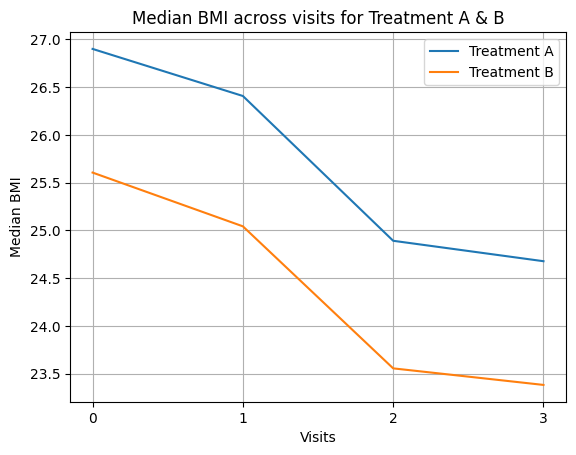

In [73]:
plt.plot(pivot_A.Visit_A, pivot_A.BMI, label ='Treatment A')
plt.plot(pivot_B.Visit_B, pivot_B.BMI, label ='Treatment B')
plt.xlabel("Visits")
plt.ylabel("Median BMI")
plt.legend()
plt.title('Median BMI across visits for Treatment A & B')
plt.xticks(range(0,4))
plt.grid()
plt.show()

### Subplots for BMI & TESTQ Scores for both Treatments.

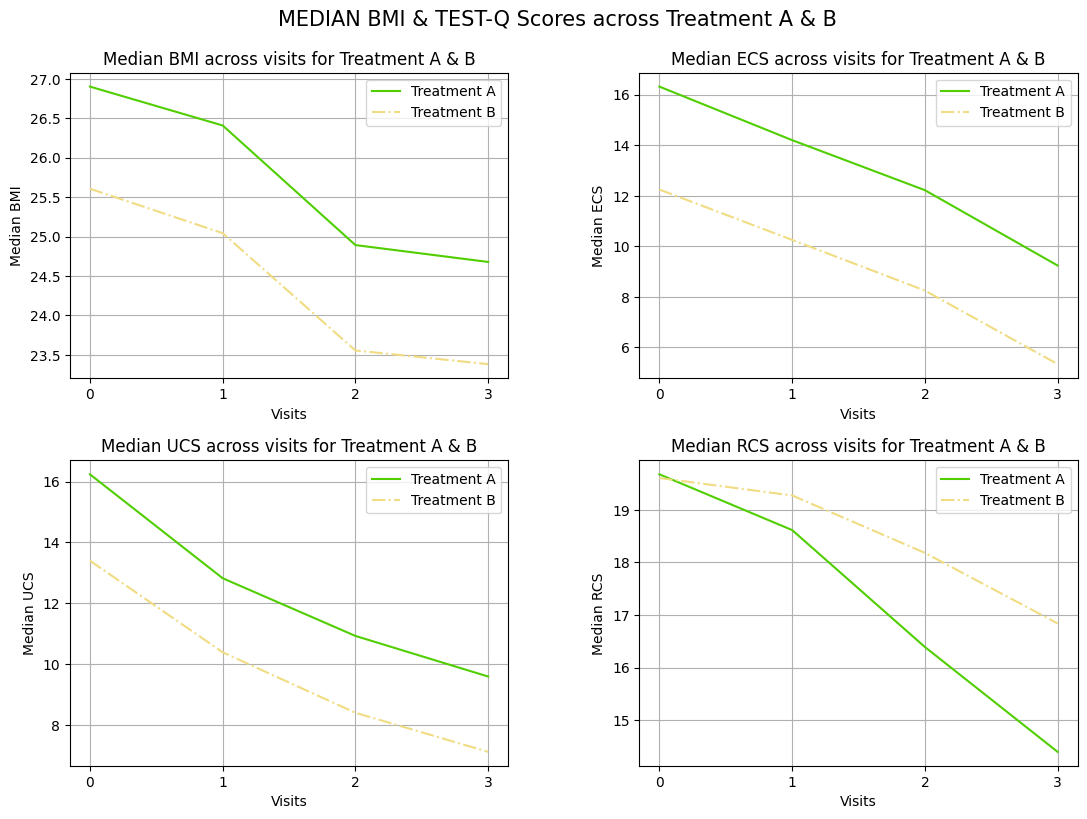

In [74]:
fig_profile, ax = plt.subplots(2, 2, figsize=(13,9))
fig_profile.suptitle('MEDIAN BMI & TEST-Q Scores across Treatment A & B', fontsize = 15, y = 0.95)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.27)

# add line whisker plot

# Median BMI[1]
ax[0, 0].plot(pivot_A.Visit_A, pivot_A.BMI, label ='Treatment A', color = "#51ce00")
ax[0, 0].plot(pivot_B.Visit_B, pivot_B.BMI, label ='Treatment B', linestyle="-.", color = "#f0dc82")
ax[0, 0].set_title('Median BMI across visits for Treatment A & B')
ax[0, 0].legend()
ax[0, 0].set_xticks(range(0, 4))

ax[0, 0].set_xlabel('Visits')
ax[0, 0].set_ylabel('Median BMI')
ax[0, 0].title.set_position([.5, 1.1])
ax[0, 0].grid()



# Median UCS[3]
ax[1, 0].plot(pivot_A.Visit_A, pivot_A.UCS, label ='Treatment A', color = "#51ce00")
ax[1, 0].plot(pivot_B.Visit_B, pivot_B.UCS, label ='Treatment B', linestyle="-.", color = "#f0dc82")
ax[1, 0].set_title('Median UCS across visits for Treatment A & B')
ax[1, 0].legend()
ax[1, 0].set_xticks(range(0, 4))

ax[1, 0].set_xlabel('Visits')
ax[1, 0].set_ylabel('Median UCS')
ax[1, 0].grid()



# Median ECS[3]
ax[0, 1].plot(pivot_A.Visit_A, pivot_A.ECS, label ='Treatment A', color = "#51ce00")
ax[0, 1].plot(pivot_B.Visit_B, pivot_B.ECS, label ='Treatment B', linestyle="-.", color = "#f0dc82")
ax[0, 1].set_title('Median ECS across visits for Treatment A & B')
ax[0, 1].legend()
ax[0, 1].set_xticks(range(0, 4))

ax[0, 1].set_xlabel('Visits')
ax[0, 1].set_ylabel('Median ECS')
ax[0, 1].grid()


# Median RCS[4]
ax[1, 1].plot(pivot_A.Visit_A, pivot_A.RCS, label ='Treatment A', color = "#51ce00")
ax[1, 1].plot(pivot_B.Visit_B, pivot_B.RCS, label ='Treatment B', linestyle="-.", color = "#f0dc82")
ax[1, 1].set_title('Median RCS across visits for Treatment A & B')
ax[1, 1].legend()
ax[1, 1].set_xticks(range(0, 4))

ax[1, 1].set_xlabel('Visits')
ax[1, 1].set_ylabel('Median RCS')
ax[1, 1].grid()



plt.show()

#### Creating dataframes for every DEMOGRAPHICS for both genders subjected to each Treatment.

In [76]:
male_medBMI_A = tre_A[tre_A.Gender0 == "Male"].BMI_0.median() , tre_A[tre_A.Gender0 == "Male"].BMI_1.median() , tre_A[tre_A.Gender0 == "Male"].BMI_2.median() , tre_A[tre_A.Gender0 == "Male"].BMI_3.median()


female_medBMI_A = tre_A[tre_A.Gender0 == "Female"].BMI_0.median() , tre_A[tre_A.Gender0 == "Female"].BMI_1.median() , tre_A[tre_A.Gender0 == "Female"].BMI_2.median() , tre_A[tre_A.Gender0 == "Female"].BMI_3.median()


male_medBMI_A,female_medBMI_A


((26.85151543866947, 26.34241841551263, 24.80960151632478, 24.665525668535),
 (26.92618228653534, 26.479377576139264, 24.91206516337498, 24.69159851579606))

In [77]:
pivot_gend_A = pd.DataFrame({"Visit_A": [0, 1, 2, 3],
                           "BMI_mal": male_medBMI_A,
                           "BMI_fem" :female_medBMI_A})

pivot_gend_A
# BMI of both genders given Treatment A

Visit_A    BMI_mal    BMI_fem
0        0  26.851515  26.926182
1        1  26.342418  26.479378
2        2  24.809602  24.912065
3        3  24.665526  24.691599

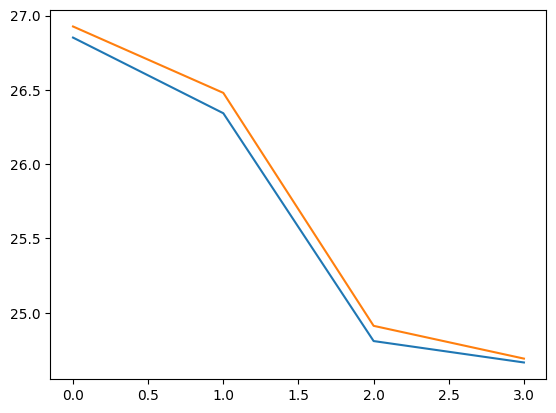

In [78]:
plt.plot(pivot_gend_A.Visit_A, pivot_gend_A.BMI_mal, label = 'Male')
plt.plot(pivot_gend_A.Visit_A, pivot_gend_A.BMI_fem, label = 'Female');

In [79]:
male_medBMI_B = tre_B[tre_B.Gender0 == "Male"].BMI_0.median() , tre_B[tre_B.Gender0 == "Male"].BMI_1.median() , tre_B[tre_B.Gender0 == "Male"].BMI_2.median() , tre_B[tre_B.Gender0 == "Male"].BMI_3.median()


female_medBMI_B = tre_B[tre_B.Gender0 == "Female"].BMI_0.median() , tre_B[tre_B.Gender0 == "Female"].BMI_1.median() , tre_B[tre_B.Gender0 == "Female"].BMI_2.median() , tre_B[tre_B.Gender0 == "Female"].BMI_3.median()

male_medBMI_B,female_medBMI_B

((25.606647636319458,
  25.05215277019908,
  23.54825962815891,
  23.363971226995417),
 (25.58946764136101, 25.01247390425375, 23.57596054818693, 23.40041554801091))

In [80]:
pivot_gend_B = pd.DataFrame({"Visit_B": [0, 1, 2, 3],
                           "BMI_mal": male_medBMI_B,
                           "BMI_fem" :female_medBMI_B})

pivot_gend_B
# BMI of both genders given Treatment B

Visit_B    BMI_mal    BMI_fem
0        0  25.606648  25.589468
1        1  25.052153  25.012474
2        2  23.548260  23.575961
3        3  23.363971  23.400416

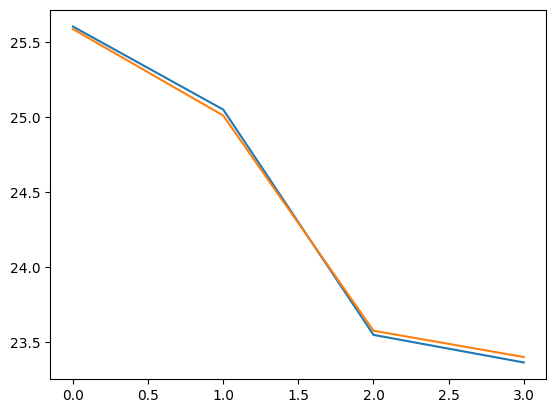

In [81]:
plt.plot(pivot_gend_B.Visit_B, pivot_gend_B.BMI_mal, label = 'Male')
plt.plot(pivot_gend_B.Visit_B, pivot_gend_B.BMI_fem, label = 'Female');

In [82]:
Cac_medBMI_B = tre_B[tre_B.Race == "Caucasian"].BMI_0.median() , tre_B[tre_B.Race == "Caucasian"].BMI_1.median() , tre_B[tre_B.Race == "Caucasian"].BMI_2.median() , tre_B[tre_B.Race == "Caucasian"].BMI_3.median()


Asi_medBMI_B = tre_B[tre_B.Race == "Asian"].BMI_0.median() , tre_B[tre_B.Race == "Asian"].BMI_1.median() , tre_B[tre_B.Race == "Asian"].BMI_2.median() , tre_B[tre_B.Race == "Asian"].BMI_3.median()

LA_medBMI_B = tre_B[tre_B.Race == "Latin American"].BMI_0.median() , tre_B[tre_B.Race == "Latin American"].BMI_1.median() , tre_B[tre_B.Race == "Latin American"].BMI_2.median() , tre_B[tre_B.Race == "Latin American"].BMI_3.median()

Afr_medBMI_B = tre_B[tre_B.Race == "African"].BMI_0.median() , tre_B[tre_B.Race == "African"].BMI_1.median() , tre_B[tre_B.Race == "African"].BMI_2.median() , tre_B[tre_B.Race == "African"].BMI_3.median()
His_medBMI_B = tre_B[tre_B.Race == "Hispanic"].BMI_0.median() , tre_B[tre_B.Race == "Hispanic"].BMI_1.median() , tre_B[tre_B.Race == "Hispanic"].BMI_2.median() , tre_B[tre_B.Race == "Hispanic"].BMI_3.median()



Cac_medBMI_B,Asi_medBMI_B,LA_medBMI_B,Afr_medBMI_B,His_medBMI_B

pivot_race_B = pd.DataFrame({"Visit_B": [0, 1, 2, 3],
                           "BMI_Cac": Cac_medBMI_B,
                           "BMI_Asi" :Asi_medBMI_B,
                           "BMI_LA" :LA_medBMI_B,
                           "BMI_Afr" :Afr_medBMI_B,
                           "BMI_His" :His_medBMI_B})

pivot_race_B
# BMI of ALL RACES given Treatment B

Visit_B    BMI_Cac    BMI_Asi     BMI_LA    BMI_Afr    BMI_His
0        0  25.735901  25.539697  25.653144  25.466335  25.606448
1        1  25.043020  25.080520  24.920070  25.077293  25.103725
2        2  23.655702  23.478641  23.560979  23.748340  23.436364
3        3  23.297058  23.452445  23.474305  23.380168  23.237241

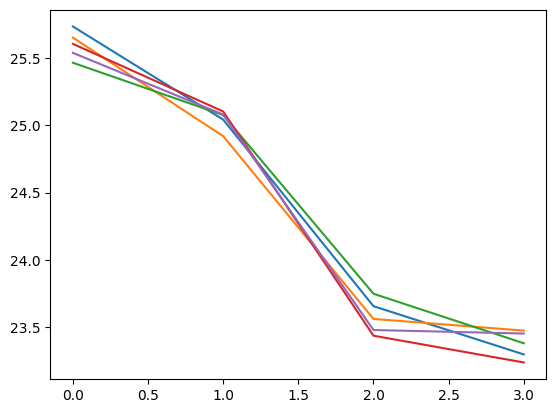

In [83]:
plt.plot(pivot_race_B.Visit_B, pivot_race_B.BMI_Cac, label = 'Cac')
plt.plot(pivot_race_B.Visit_B, pivot_race_B.BMI_LA, label = 'LA')
plt.plot(pivot_race_B.Visit_B, pivot_race_B.BMI_Afr, label = 'Afr')
plt.plot(pivot_race_B.Visit_B, pivot_race_B.BMI_His, label = 'His')
plt.plot(pivot_race_B.Visit_B, pivot_race_B.BMI_Asi, label = 'Asian');

### Use pd.groupby to get Descriptive Statistics accross column categories.

In [84]:
pivot_race_A = tre_A.groupby("Race")[["BMI_0", "BMI_1", "BMI_2", "BMI_3"]].median()

pivot_race_A
# BMI of ALL RACES given Treatment A

BMI_0      BMI_1      BMI_2      BMI_3
Race                                                      
African         26.579423  26.396210  24.894656  24.729597
Asian           26.907371  26.418994  24.892994  24.635009
Caucasian       26.902647  26.381612  24.946997  25.199178
Hispanic        27.204897  26.335754  24.677607  24.568867
Latin American  26.973421  26.442640  24.978242  24.665526

In [85]:
pivot_race_A.loc["African"]

BMI_0    26.579423
BMI_1    26.396210
BMI_2    24.894656
BMI_3    24.729597
Name: African, dtype: float64

In [86]:
pivot_Country_A = tre_A.groupby("Country")[["BMI_0", "BMI_1", "BMI_2", "BMI_3"]].median()
pivot_Country_A

# BMI of patients of ALL COUNTRIES given Treatment A

BMI_0      BMI_1      BMI_2      BMI_3
Country                                                 
Brazil        26.973421  26.442640  24.978242  24.665526
China         26.907371  26.418994  24.892994  24.635009
Cook Islands  26.579423  26.396210  24.894656  24.729597
Mexico        27.204897  26.335754  24.677607  24.568867
USA           26.902647  26.381612  24.946997  25.199178

In [87]:
pivot_Country_B = tre_B.groupby("Country")[["BMI_0", "BMI_1", "BMI_2", "BMI_3"]].median()
pivot_Country_B

# BMI of patients of ALL COUNTRIES given Treatment B

BMI_0      BMI_1      BMI_2      BMI_3
Country                                                 
Brazil        25.653144  24.920070  23.560979  23.474305
China         25.539697  25.080520  23.478641  23.452445
Cook Islands  25.466335  25.077293  23.748340  23.380168
Mexico        25.606448  25.103725  23.436364  23.237241
USA           25.735901  25.043020  23.655702  23.297058

In [88]:
pivot_Age_A = tre_A.groupby("Age")[["BMI_0", "BMI_1", "BMI_2", "BMI_3"]].median()
pivot_Age_A

# BMI of patients of ALL AGES given Treatment A

BMI_0      BMI_1      BMI_2      BMI_3
Age                                            
12   26.717389  26.591461  24.720303  24.330560
13   26.819431  26.371651  24.755500  24.582208
14   27.237891  26.413474  24.863182  24.691599
15   26.886951  25.924244  25.045088  24.697019
16   26.895762  26.481215  24.724324  24.795104
17   26.884273  26.436412  24.902935  24.640377
18   26.985615  26.528401  25.302024  25.004331

In [89]:
pivot_Age_B = tre_B.groupby("Age")[["BMI_0", "BMI_1", "BMI_2", "BMI_3"]].median()
pivot_Age_B

# BMI of patients of ALL AGES given Treatment B

BMI_0      BMI_1      BMI_2      BMI_3
Age                                            
12   25.324900  25.565792  23.247607  23.552214
13   25.607294  25.110809  23.623027  23.476713
14   25.764090  25.044455  23.558089  23.307127
15   25.449951  24.921163  23.547734  23.563373
16   25.514501  25.125312  23.401800  23.346067
17   25.652959  25.048178  23.544210  23.408130
18   25.705703  24.983694  23.815333  23.326807

### SUBPLOTS FOR ALL DEMOGRAPHICS DDIFFERING BY TREATMENT A & B.

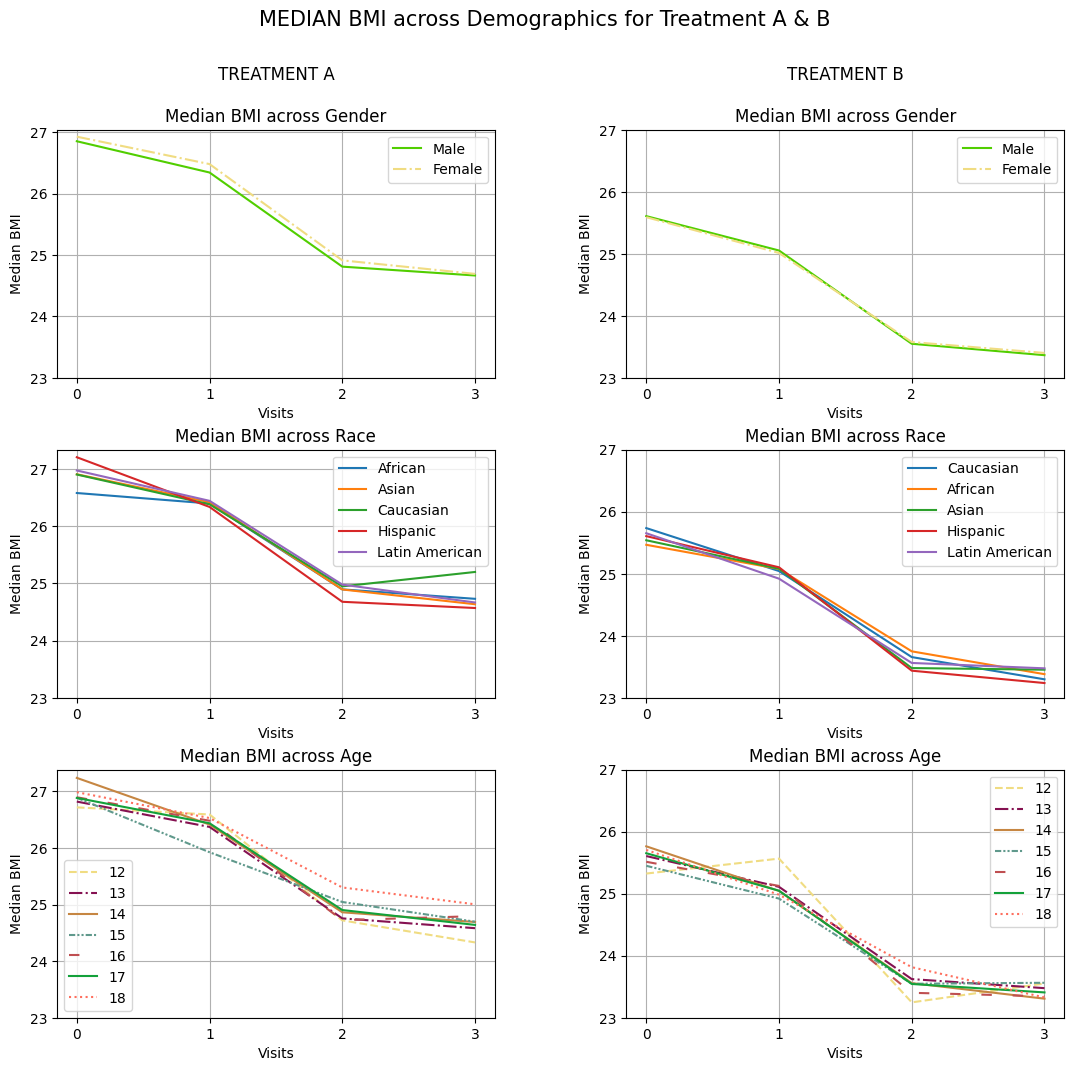

In [90]:
fig_Demo, ax = plt.subplots(3, 2, figsize=(13,12))
fig_Demo.suptitle('MEDIAN BMI across Demographics for Treatment A & B', fontsize = 15, y = 0.95)
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.85, wspace=0.3, hspace=0.29)


# [1]
ax[0, 0].plot(pivot_gend_A.Visit_A, pivot_gend_A.BMI_mal, label = 'Male', color = "#51ce00")
ax[0, 0].plot(pivot_gend_A.Visit_A, pivot_gend_A.BMI_fem, label = 'Female', linestyle="-.", color = "#f0dc82")
ax[0, 0].set_title('TREATMENT A'+'\n\nMedian BMI across Gender')
ax[0, 0].legend()
ax[0, 0].set_xticks(range(0, 4))

ax[0, 0].set_yticks(range(23, 28))
ax[0, 0].set_xlabel('Visits')
ax[0, 0].set_ylabel('Median BMI')
ax[0, 0].title.set_position([.5, 1.1])
ax[0, 0].grid()


# [2]
ax[0, 1].plot(pivot_gend_B.Visit_B, pivot_gend_B.BMI_mal, label = 'Male', color = "#51ce00")
ax[0, 1].plot(pivot_gend_B.Visit_B, pivot_gend_B.BMI_fem, label = 'Female', linestyle="-.", color = "#f0dc82")
ax[0, 1].set_title('TREATMENT B'+'\n\nMedian BMI across Gender')
ax[0, 1].legend()
ax[0, 1].set_xticks(range(0, 4))

ax[0, 1].set_yticks(range(23, 28))
ax[0, 1].set_xlabel('Visits')
ax[0, 1].set_ylabel('Median BMI')
ax[0, 1].title.set_position([.5, 1.1])
ax[0, 1].grid()


# [3]
ax[1, 0].plot([0,1,2,3], pivot_race_A.loc["African"], label = 'African')
ax[1, 0].plot([0,1,2,3], pivot_race_A.loc["Asian"], label = 'Asian')
ax[1, 0].plot([0,1,2,3], pivot_race_A.loc["Caucasian"], label = 'Caucasian')
ax[1, 0].plot([0,1,2,3], pivot_race_A.loc["Hispanic"], label = 'Hispanic')
ax[1, 0].plot([0,1,2,3], pivot_race_A.loc["Latin American"], label = 'Latin American')
ax[1, 0].set_title('Median BMI across Race')
ax[1, 0].legend()
ax[1, 0].set_xticks(range(0, 4))

ax[1, 0].set_yticks(range(23, 28))
ax[1, 0].set_xlabel('Visits')
ax[1, 0].set_ylabel('Median BMI')
ax[1, 0].title.set_position([.5, 1.1])
ax[1, 0].grid()


# [4]
ax[1, 1].plot(pivot_race_B.Visit_B, pivot_race_B.BMI_Cac, label = 'Caucasian')
ax[1, 1].plot(pivot_race_B.Visit_B, pivot_race_B.BMI_Afr, label = 'African')
ax[1, 1].plot(pivot_race_B.Visit_B, pivot_race_B.BMI_Asi, label = 'Asian')
ax[1, 1].plot(pivot_race_B.Visit_B, pivot_race_B.BMI_His, label = 'Hispanic')
ax[1, 1].plot(pivot_race_B.Visit_B, pivot_race_B.BMI_LA, label = 'Latin American')
ax[1, 1].set_title('Median BMI across Race')
ax[1, 1].legend()
ax[1, 1].set_xticks(range(0, 4))

ax[1, 1].set_yticks(range(23, 28))
ax[1, 1].set_xlabel('Visits')
ax[1, 1].set_ylabel('Median BMI')
ax[1, 1].title.set_position([.5, 1.1])
ax[1, 1].grid()



# [5]
ax[2, 0].plot([0,1,2,3], pivot_Age_A.loc[12], label = '12', linestyle="--", color = "#f0dc82")
ax[2, 0].plot([0,1,2,3], pivot_Age_A.loc[13], label = '13', linestyle="-.", color = "#851151")
ax[2, 0].plot([0,1,2,3], pivot_Age_A.loc[14], label = '14', linestyle="solid", color = "#c68642")
ax[2, 0].plot([0,1,2,3], pivot_Age_A.loc[15], label = '15', linestyle=(0, (3, 1, 1, 1, 1, 1)), color = "#60998c")
ax[2, 0].plot([0,1,2,3], pivot_Age_A.loc[16], label = '16', linestyle=(0, (5, 10)), color = "#bf4f51")
ax[2, 0].plot([0,1,2,3], pivot_Age_A.loc[17], label = '17', linestyle="solid", color = "#13a13a")
ax[2, 0].plot([0,1,2,3], pivot_Age_A.loc[18], label = '18', linestyle=":", color = "#fe6f5e")
ax[2, 0].set_title('Median BMI across Age')
ax[2, 0].legend()
ax[2, 0].set_xticks(range(0, 4))
ax[2, 0].set_yticks(range(23, 28))
ax[2, 0].set_xlabel('Visits')
ax[2, 0].set_ylabel('Median BMI')
ax[2, 0].title.set_position([.5, 1.1])
ax[2, 0].grid()



# [6]
ax[2, 1].plot([0,1,2,3], pivot_Age_B.loc[12], label = '12', linestyle="--", color = "#f0dc82")
ax[2, 1].plot([0,1,2,3], pivot_Age_B.loc[13], label = '13', linestyle="-.", color = "#851151")
ax[2, 1].plot([0,1,2,3], pivot_Age_B.loc[14], label = '14', linestyle="solid", color = "#c68642")
ax[2, 1].plot([0,1,2,3], pivot_Age_B.loc[15], label = '15', linestyle=(0, (3, 1, 1, 1, 1, 1)), color = "#60998c")
ax[2, 1].plot([0,1,2,3], pivot_Age_B.loc[16], label = '16', linestyle=(0, (5, 10)), color = "#bf4f51")
ax[2, 1].plot([0,1,2,3], pivot_Age_B.loc[17], label = '17', linestyle="solid", color = "#13a13a")
ax[2, 1].plot([0,1,2,3], pivot_Age_B.loc[18], label = '18', linestyle=":", color = "#fe6f5e")
ax[2, 1].set_title('Median BMI across Age')
ax[2, 1].legend()
ax[2, 1].set_xticks(range(0, 4))
ax[2, 1].set_yticks(range(23, 28))
ax[2, 1].set_xlabel('Visits')
ax[2, 1].set_ylabel('Median BMI')
ax[2, 1].title.set_position([.5, 1.1])
ax[2, 1].grid()


plt.show()

### Median values for creating a suggestion table.

Available in <https://github.com/sankhadeepriju/Drug-Comparison>

In [91]:
print(tre_A[tre_A["Gender0"] == "Male"].ECS_0.median() - tre_A[tre_A["Gender0"] == "Male"].ECS_3.median()),
(tre_B[tre_B["Gender0"] == "Male"].ECS_0.median() - tre_B[tre_B["Gender0"] == "Male"].ECS_3.median())

7.306242526672291


6.974246126675244

In [92]:
print(tre_A[tre_A["Age"] == 15].UCS_0.median() - tre_A[tre_A["Age"] == 15].UCS_3.median()),
(tre_B[tre_B["Age"] == 15].UCS_0.median() - tre_B[tre_B["Age"] == 15].UCS_3.median())

6.831477117429227


5.878925600896429

In [93]:
print(tre_A[tre_A["Age"] == 17].UCS_0.median() - tre_A[tre_A["Age"] == 17].UCS_3.median()),
(tre_B[tre_B["Age"] == 17].UCS_0.median() - tre_B[tre_B["Age"] == 17].UCS_3.median())

6.733317558220218


5.185589055850196

In [94]:
print(tre_A[tre_A["Race"] == "Caucasian"].ECS_0.median() - tre_A[tre_A["Race"] == "Caucasian"].ECS_3.median()),
(tre_B[tre_B["Race"] == "Caucasian"].ECS_0.median() - tre_B[tre_B["Race"] == "Caucasian"].ECS_3.median())


6.317122973427093


7.43367242198128

In [95]:
print(tre_A.RCS_0.median() - tre_A.RCS_3.median()),
(tre_B.RCS_0.median() - tre_B.RCS_3.median())


5.274135333520791


2.762861502209301

In [96]:
print(tre_A.UCS_0.median() - tre_A.UCS_3.median()),
(tre_B.UCS_0.median() - tre_B.UCS_3.median())


6.646995727799659


6.283898698102949